In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns

matplotlib.font_manager._rebuild()
import numpy as np
from matplotlib.dates import DateFormatter

1. online
2. nothing
3. VMS
4. radio
5. full stack
7. full stack - limited capacity

### Parse
---

In [2]:
paths = ["E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_02.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_01.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_03.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_04.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_05.xlsx"]
sheets = ["Event", "A01", "A02"]


prepare common index (timestamp)

In [3]:
idx = pd.date_range('00:00', '03:59:59', freq = '12s')
df = pd.DataFrame( index=idx)

parse data

In [4]:
for path in paths:
    for sheet in sheets:
        new_data = pd.read_excel(path, sheet_name=sheet, usecols=[1,3,4], index_col = 'time')
        new_data = new_data[new_data['name']=='iflw EQUIVALENT']['value']
        df[path.split("_")[-1].split(".")[0]+"_"+sheet] = new_data.values     

group data

In [5]:
experiment_names = ["online information", "no information","VMS", "radio news", "mixed"]
event = df[['01_Event','02_Event','03_Event','04_Event','05_Event']]
event.columns = experiment_names
a1 = df[['01_A01','02_A01','03_A01','04_A01','05_A01']]
a1.columns = experiment_names
a2 = df[['01_A02','02_A02','03_A02','04_A02','05_A02']]
a2.columns = experiment_names

# Plot
---

setup

In [158]:
titles =  [ 'Inflow at the event arc', 'Inflow at the eastern alternative arc', 'Inflow at the western alternative arc']
colors = ['black']*5
linestyles = ['-', '-', '--', ':', "--"]
dashes = [(1,0)]*5
dashes[2]=(10,10)
dashes[3]=(3,2)
markers = [None]*5
markers[0]="s"
lw=[0,0.5,0.5,2,2]
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.family"] = "Times New Roman"
#del matplotlib.font_manager.weight_dict['roman']

In [161]:
def p(df, title, ylim = [300,490], name=None):
    fig, axes = plt.subplots(1)
    axes.text(0.01, 0.13,'time of:', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.01, 0.03,'event', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.22, 0.08,'online', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.22, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.39, 0.08,'VMS', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.39, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.52, 0.08,'radio', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.52, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    
    i = 0

    for col in [ "no information","online information","VMS", "radio news", "mixed"]:
        df[col].rolling(10).mean().plot(color=colors[i], 
                                           linestyle=linestyles[i],
                                           lw=lw[i],marker = markers[i], markevery = 6,dashes = dashes[i], markersize=4,
                                           ax = axes, legend=True)
        i+=1
    axes.axvline(x=event.index[300], color = 'black', linestyle='-', lw=2)
    axes.axvline(x=event.index[360], color = 'black', linestyle='-', lw=0.5)
    axes.axvline(x=event.index[408], color = 'black', linestyle='-', lw=0.5)
    axes.axvline(x=event.index[448], color = 'black', linestyle='-', lw=0.5)
    axes.set_xlim(event.index[298],event.index[590])
    axes.set_ylim(ylim[0],ylim[1])
    axes.legend(loc="lower left", bbox_to_anchor=(0.03,0.5))
    plt.title(title)
    if name:
        plt.savefig(name, dpi = 720)
    plt.show()

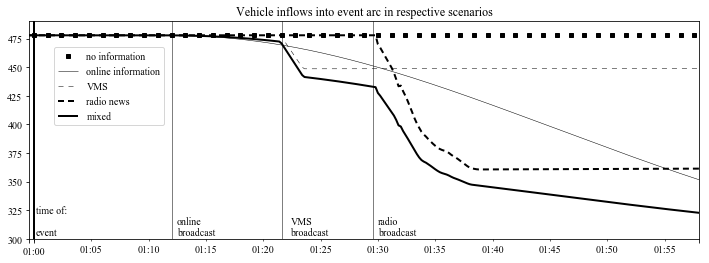

In [164]:
p(event, "Vehicle inflows into event arc in respective scenarios", ylim=[300,490], name = "event.png")

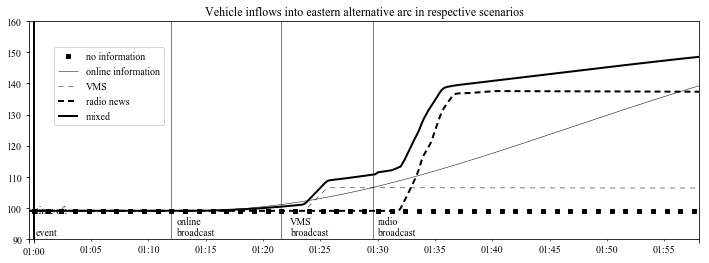

In [165]:
p(a1, "Vehicle inflows into eastern alternative arc in respective scenarios", ylim=[90,160], name='a1.png')

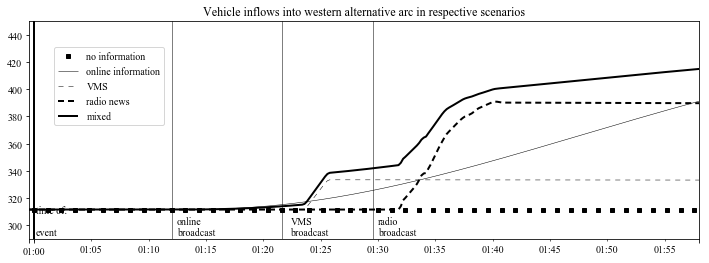

In [166]:
p(a2, "Vehicle inflows into western alternative arc in respective scenarios", ylim=[290,450], name='a2.png')

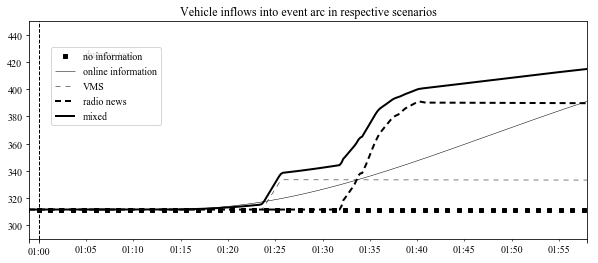

In [58]:
fig, axes = plt.subplots(1)
i = 0
for col in [ "no information","online information","VMS", "radio news", "mixed"]:
    a2[col].rolling(10).mean().plot(color=colors[i], 
                                       linestyle=linestyles[i],
                                       lw=lw[i],marker = markers[i], markevery = 6,dashes = dashes[i], markersize=4,
                                       ax = axes, legend=True)
    i+=1
axes.axvline(x=event.index[300], color = 'black', linestyle='--', lw=1)
axes.set_xlim(event.index[295],event.index[590])
axes.set_ylim(290,450)
axes.legend(loc="lower left", bbox_to_anchor=(0.03,0.5))
plt.title("Vehicle inflows into event arc in respective scenarios")
plt.savefig("a2.png", dpi = 720)
plt.show()